# Physics 5300: Theoretical Mechanics Final Project
Author: Jacob Borison<br />
Writen: 04/19/2023<br />
Submitted: 05/25/2023, 7:55 PM

##### This project will be submitted as the final project for physics 5300, taught by Professor Richard Furnstahl. The submission is due by April $28^{th}$, 2023. This notebook aims to summarize the content learned in physics 5300 - the physical principals, as well as the coding methods. 

### Problem 1: Double (and more) pendulum

The potential and kinetic energy of a double pendulum can be quantufied by the equations below.

$$ U(\phi_1,\phi_2) = (m_1+m_2)gL_1[1-\cos(\phi_1)]m_2gL_2[1-\cos(\phi_2)]$$
$$ T = \frac{1}{2}(m_1+m_2)L_1\dot\phi_1^2+m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2)+\frac{1}{2}m_2L_2\dot\phi_2^2 $$
Using the Euler-Lagrange equations, the motion of the double pendulum can be fully solved. These equations are written below.
$$ L = T - U $$
$$ \frac{d}{dt}\frac{\partial L}{\partial \dot q} -  \frac{\partial L}{\partial q_i} = 0 $$
After applying Lagrange's equations, the motion of the double pendulum can be numerically determined. However, in this instance, the nonlinearity of the second order differential equation means the motion cannot be fully predetermined analytically, resulting in chaotic motion. <br />
Lagrange's equations output two, coupled differential equations - one for each generalized coordinate of the system. These two coordinates are $\phi_1$ and $\phi_2$, corrosponding to the first and second pendulums' angle with respect to the vertical. Since both pendulums are constrained in their lengths and pivot points, any additional coordinates would be superfluous. <br />
Since the equations of motion are coupled, $\phi_1$ and $\dot \phi_1$ are dependant on $\dot \phi_2$ and $\phi_2$, and vice versa. To solve for both independant second-order differential equations, the two equations must be uncoupled using linear algebra, resulting in two long expressions with 8 terms each. The equations of motion can then be used to build software to simulate a real double pendulum, all in code.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

In [2]:
class Double_Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     each arm of the double pendulum using Lagrange's equations.
     
    Parameters
    ----------
    g: float
        gravity, the only external force on the double pendulum
    L1: float
        length of the top pendulum
    L2: float
        length of the bottom pendulum
    m1: float
        mass of the top pendulum
    m2: float
        mass of the bottom pendulum
    

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self,g=1,L1=1,L2=1,m1=1,m2=1
                ):
        self.g = g
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, y, t):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt, d^2phi_1/dt^2, dphi_2/dt, d^2phi_2/dt^2 ]
        
        Parameters
        ----------
        y : float
            A 4-component vector with y[0] = phi_1(t),  y[1] = dphi_1/dt, 
                                      y[2] = phi_2(t),  y[3] = dphi_2/dt
        t : float
            time 
            
        Returns
        -------
        
        """

#  ------ For Reference 
#         phi1 = y[0]
#         phi2 = y[2]
#         dphi1_dt = y[1]
#         dphi2_dt = y[3]

        phi1_dot_dot = (-self.L2*self.m2/(self.L1*(self.m1+self.m2))*y[3]**2*np.sin(y[0]-y[2])\
                        -self.g/self.L1*np.sin(y[0]) - (self.L2*self.m2/(self.L1*(self.m1+self.m2))\
                        *np.cos(y[0]-y[2])) * (self.L1*y[1]**2*np.sin(y[0]-y[2])-self.g/self.L2*np.sin(y[2]))) / \
                        ((1-self.L1/self.L2*np.cos(y[0]-y[2]) * self.L2*self.m2/(self.L1*(self.m1+self.m2))\
                         *np.cos(y[0]-y[2])))
        phi2_dot_dot = (self.L1*y[1]**2*np.sin(y[0]-y[2])-self.g/self.L2*np.sin(y[2]) - \
                        self.L2*self.m2/(self.L1*(self.m1+self.m2))*np.cos(y[0]-y[2]) * \
                        (-self.L2*self.m2/(self.L1*(self.m1+self.m2))*y[3]**2*np.sin(y[0]-y[2])\
                         -self.g/self.L1*np.sin(y[0]))) / ((1-self.L1/self.L2*np.cos(y[0]-y[2]) * \
                        self.L2*self.m2/(self.L1*(self.m1+self.m2))*np.cos(y[0]-y[2])))
                        
        answerVec = []
        answerVec.append(y[1])
        answerVec.append(phi1_dot_dot)
        answerVec.append(y[3])
        answerVec.append(phi2_dot_dot)
        
        return answerVec
    
    def solve_ode(self, phi_0_1, phi_dot_0_1, phi_0_2, phi_dot_0_2, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0_1, phi_dot_0_1, phi_0_2, phi_dot_0_2]  
        phi_1, phi_dot_1, phi_2, phi_dot_2 = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi_1, phi_dot_1, phi_2, phi_dot_2

The double pendulum class is built above, with it's identity being held in the dy/dt function. Specifically, the differential equation is numerically solved for each point, and returned by this function. With this class, the p1 double pendulum can be instantiated with initial conditions $\phi_1(0) = \frac{\pi}{2}$, $\phi_2(0) = 0$, and $\dot \phi_1(0) = \dot \phi_2(0) = 0$. The final result is a double pendulum with motion described fully for 200 seconds.

In [3]:
L1=1 # Used for animation
L2=1 # Used for animation
p1 = Double_Pendulum(g=1,L1=L1,L2=L2,m1=1,m2=1)
phi_0_1 = np.pi/2
phi_0_2 = 0
phi_dot_0_1 = 0
phi_dot_0_2 = 0

t_start = 0.
t_end = 200.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

phi_1, phi_dot_1, phi_2, phi_dot_2 = p1.solve_ode(phi_0_1, phi_dot_0_1, phi_0_2, phi_dot_0_2)

At this point the simulation has already taken place. The data is held within the vectors in the cell above, and can now be analyzed using plots.

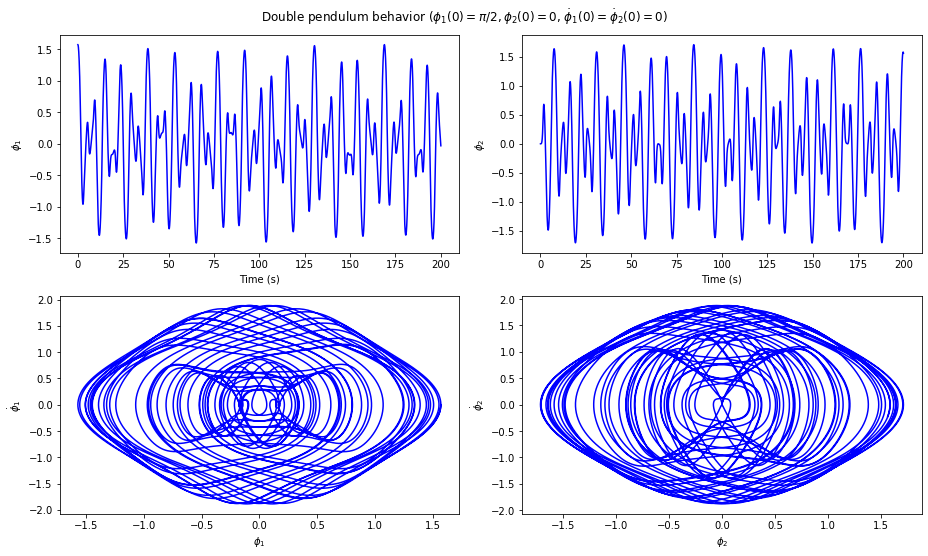

In [4]:
fig, ax = plt.subplots(2, 2, figsize = (13,8))#, sharex=True)

ax[0,0].plot(t_pts, phi_1, color='blue')#, label='sin(x)')
ax[0,0].set_ylabel('$\phi_1$')
ax[0,0].set_xlabel('Time (s)')

ax[0,1].plot(t_pts, phi_2, color='blue')#, label='sin(x)')
ax[0,1].set_ylabel('$\phi_2$')
ax[0,1].set_xlabel('Time (s)')

ax[1,0].plot(phi_1, phi_dot_1, color='blue')#, label='sin(x)')
ax[1,0].set_ylabel('$\dot \phi_1$')
ax[1,0].set_xlabel('$\phi_1$')

ax[1,1].plot(phi_2, phi_dot_2, color='blue')#, label='sin(x)')
ax[1,1].set_ylabel('$\dot \phi_2$')
ax[1,1].set_xlabel('$\phi_2$')

fig.suptitle('Double pendulum behavior ($\phi_1(0) = \pi/2, \phi_2(0) = 0$, $\dot \phi_1(0) = \dot \phi_2(0) = 0$)')#, fontsize=25)
fig.tight_layout(rect=[0, 0.02, 1, 0.95])

The results can be verified using several visual cues. First, the initial conditions are correctly implimented, as seen in the starting positions in the top row of the figure. Additionally, the expected chaotic behavior of the double pendulum is displayed by the phase space diagrams. There are no connecting paths in the phase space, meaning the motion is not periodic. The results of the code can be further verified by using new initial conditions. For the case of $\phi_1(0) = \phi_2(0) = \frac{\pi}{2}$ and $\dot \phi_1(0) = \dot \phi_2(0) = 0$, we would expect the behavior of a single pendulum of length $L_1+L_2$, with mass $m_1+m_2$. These results are seen below.

In [5]:
p1 = Double_Pendulum(g=1,L1=1,L2=1,m1=1,m2=1)
phi_0_1 = np.pi/2
phi_0_2 = np.pi/2
phi_dot_0_1 = 0
phi_dot_0_2 = 0

t_start = 0.
t_end = 200.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

phi_1_new, phi_dot_1_new, phi_2_new, phi_dot_2_new = p1.solve_ode(phi_0_1, phi_dot_0_1, phi_0_2, phi_dot_0_2)

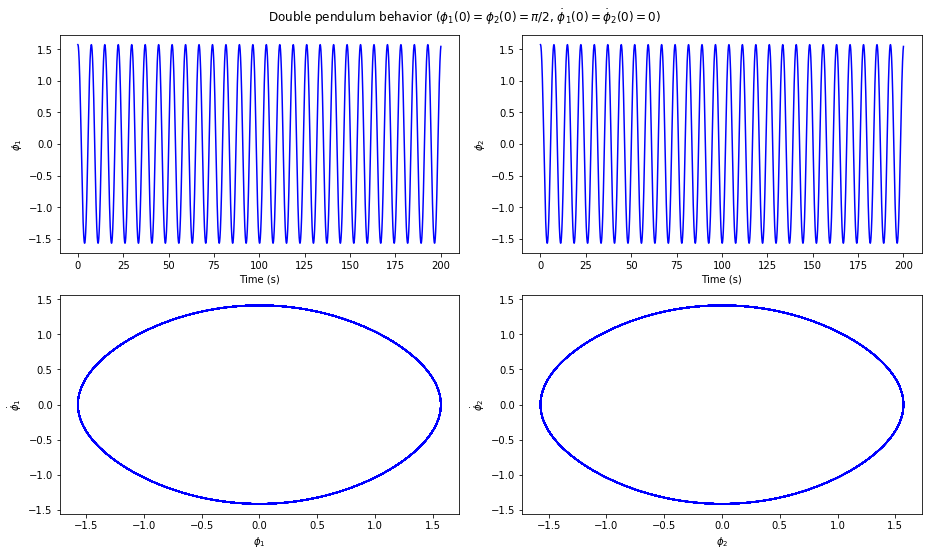

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (13,8))#, sharex=True)

ax[0,0].plot(t_pts, phi_1_new, color='blue')#, label='sin(x)')
ax[0,0].set_ylabel('$\phi_1$')
ax[0,0].set_xlabel('Time (s)')

ax[0,1].plot(t_pts, phi_2_new, color='blue')#, label='sin(x)')
ax[0,1].set_ylabel('$\phi_2$')
ax[0,1].set_xlabel('Time (s)')

ax[1,0].plot(phi_1_new, phi_dot_1_new, color='blue')#, label='sin(x)')
ax[1,0].set_ylabel('$\dot \phi_1$')
ax[1,0].set_xlabel('$\phi_1$')

ax[1,1].plot(phi_2_new, phi_dot_2_new, color='blue')#, label='sin(x)')
ax[1,1].set_ylabel('$\dot \phi_2$')
ax[1,1].set_xlabel('$\phi_2$')

fig.suptitle('Double pendulum behavior ($\phi_1(0) = \phi_2(0) = \pi/2$, $\dot \phi_1(0) = \dot \phi_2(0) = 0$)')#, fontsize=25)
fig.tight_layout(rect=[0, 0.02, 1, 0.95])

As expected, the resulting motion is not chaotic. Specifically, it has a period of roughyl 3.7, with a fully continuous path in the phase space. The chaotic double pendulum can be watched in an animation, as seen below. This provides an intuitive visual into the chaotic behavior of the pendulum

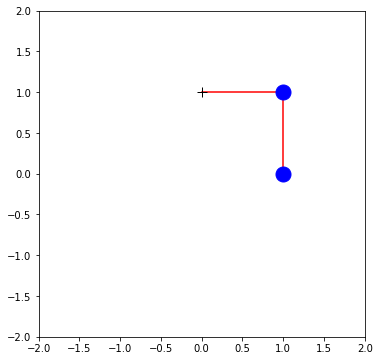

In [7]:
def plot_double_pendulum(i):
    global anim
    ax.clear()
    phi1 = phi_1[20*i]
    phi2 = phi_2[20*i]
    x1 = L1*np.sin(phi1)
    y1 = 1 - L1*np.cos(phi1)
    x2 = x1 + np.sin(phi2)
    y2 = y1 - np.cos(phi2)
    x = [x1,x2]
    y = [y1,y2]

    top_armsX = np.linspace(0,x1,100)
    top_armsY = np.linspace(1,y1,100)
    bottom_armsX = np.linspace(x1,x2,100)
    bottom_armsY = np.linspace(y1,y2,100)
    plt.plot(bottom_armsX, bottom_armsY, color='red')
    plt.plot(top_armsX, top_armsY, color='red')

    plt.plot(x, y, 'o', color='blue', markersize=15)
    plt.plot(0, 1, '+', color='black', markersize=10)

    ax.set_ylim(-L1-L2,L1+L2)
    ax.set_xlim(-L1-L2,L1+L2)
    ax.set_aspect('equal')

fig, ax = plt.subplots(figsize=(6,6))
anim = FuncAnimation(fig, plot_double_pendulum, frames=200, interval=50)
HTML(anim.to_jshtml())

### Problem 2: Gravitational orbits in Cartesian coordinates

Gravitational orbits have been studied since the Isaac Newton, though modern technology offers resources that he could never have imagined. Using software, we can numerically solve and simulate the orbits of any system of bodies. In this notebook, the two body problem will be simulated.

This problem begins simply with Newton's Second Law, 
$$ \vec{F}=m\vec{a}$$
A body experiencing a gravitational orbit is subjected to a force of 
$$ \vec{F}_g = \frac{Gm_1m_2\vec{r}} {r^3}$$
where $\vec{r}$ is the seperation vector and r is the distance between the two masses. So, the final differential equations to be solved for each body are, 
$$ \vec{\ddot x}_1 = \frac{Gm_2|\vec{x}_2-\vec{x}_1|} {\vec{r}^3} \hspace{2.5cm} \vec{\ddot x}_2 = \frac{Gm_1|\vec{x}_1-\vec{\dot x}_2|} {\vec{r}^3}$$ 
These can be solved using methods very similar to those used in the double pendulum problem, by setting up a new class.

In [8]:
class Two_body():
    """
    Two_body class implements the parameters and differential equations for 
     two bodies orbiting about the center of mass.
     
    Parameters
    ----------
    G: float
        Graviational constant, determines the magnitude of the gravitational force
    m1: float
        mass of the first body
    m2: float
        mass of the second body

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector z, 
        given time t and the corresponding value of z.
    """
    def __init__(self,G=1,m1=1,m2=1
                ):
        self.G = G
        self.m1 = m1
        self.m2 = m2
    
    def dz_dt(self, z, t):
        """
        This function returns the right-hand side of the diffeq: 
        [dz_1/dt, d^2z_1/dt^2, dz_2/dt, d^2z_2/dt^2 ]
        
        Parameters
        ----------
        z : float
            An 8-component vector with z[0] = x1(t),  z[1] = dx1/dt
                                       z[2] = y1(t),  z[3] = dy1/dt
                                       z[4] = x2(t),  z[5] = dx2/dt
                                       z[6] = y2(t),  z[7] = dy2/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        r = np.sqrt((z[0]-z[4])**2 + (z[2]-z[6])**2)
        
        x1_dot_dot = self.G * m2 * (z[4]-z[0]) / r**3
        y1_dot_dot = self.G * m2 * (z[6]-z[2]) / r**3
        x2_dot_dot = self.G * m1 * (z[0]-z[4]) / r**3
        y2_dot_dot = self.G * m1 * (z[2]-z[6]) / r**3
        
        
        answerVec = []
        answerVec.append(z[1])
        answerVec.append(x1_dot_dot)
        answerVec.append(z[3])
        answerVec.append(y1_dot_dot)
        answerVec.append(z[5])
        answerVec.append(x2_dot_dot)
        answerVec.append(z[7])
        answerVec.append(y2_dot_dot)
        
        return answerVec
    
    def solve_ode(self, t_pts, z0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        final_vec = odeint(self.dz_dt, z0, t_pts, 
                              atol=abserr, rtol=relerr).T
        return final_vec

Just as before, we now must instantiate the two body class with initial conditions. The mass fraction is arbitrary, though in order to obtain reasonable orbits, we must tweak the initial positions and velicities of the bodies. After generating the data, the results can be plotted.

In [9]:
m1=1
m2=5
o1 = Two_body(G=1,m1=m1,m2=m2)

t_start = 0.
t_end = 10.
delta_t = 0.01
t_pts = np.arange(t_start, t_end+delta_t, delta_t)

# COM velocity must be zero in initial conditions so the system doesn't move out of frame
x1_0 = 1
x1dot_0 = -1
y1_0 = 1
y1dot_0 = 1
x2_0 = -m1/m2*x1_0
x2dot_0 = -m1/m2*x1dot_0
y2_0 = -m1/m2*y1_0
y2dot_0 = -m1/m2*y1dot_0

x_com = (x1_0*m1+x2_0*m2)/(m1+m2)
y_com = (y1_0*m1+y2_0*m2)/(m1+m2)

z0 = [x1_0,x1dot_0,y1_0,y1dot_0,x2_0,x2dot_0,y2_0,y2dot_0]
x_1,x_1_dot,y_1,y_1_dot,x_2,x_2_dot,y_2,y_2_dot = o1.solve_ode(t_pts,z0)


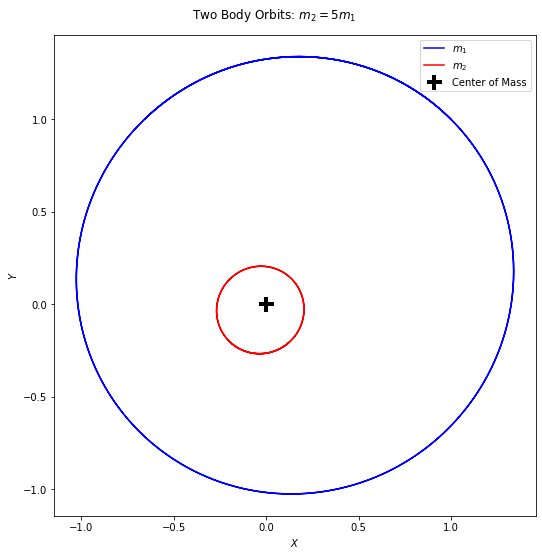

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))#, sharex=True)

ax.plot(x_1, y_1, color='blue', label = '$m_1$')#, label='sin(x)')
ax.plot(x_2, y_2, color='red', label = '$m_2$')#, label='sin(x)')
ax.plot(x_com, y_com, '+',color='black',  mew=4, markersize = 15, label = 'Center of Mass')#, label='sin(x)')

ax.set_aspect('equal')
ax.set_ylabel('$Y$')
ax.set_xlabel('$X$')
ax.legend()
# fig.suptitle('Phase Space Diagram for Double Pendulum', fontsize=16)
# fig.tight_layout(rect=[0, 0.02, 1, 0.95])

# ax[0].legend()
fig.suptitle('Two Body Orbits: $m_2=5m_1$')# ($\phi_1(0) = \phi_2(0) = \pi/2$, $\dot \phi_1(0) = \dot \phi_2(0) = 0$)')#, fontsize=25)
fig.tight_layout(rect=[0, 0.02, 1, 0.95])

As expected, the simulation produces two masses with closely circular orbits. The lighter mass orbits with a much larger radius than the heavier, and they both orbit the center of mass. <br />
The initial conditions of the system place the center of mass at (0,0), with no velocity. This allows for both bodies to orbit the center of mass without drifting out of frame. The orbital radii aare determined by the mass fraction of the two bodies, in this case $m_2=5m_1$. The orbits can also be visualized in the animation below.

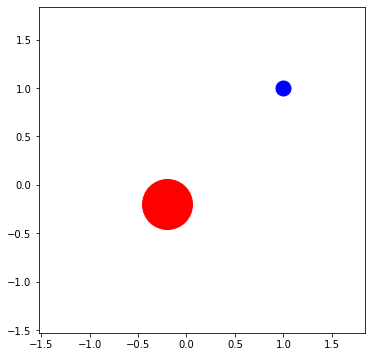

In [11]:
def plot_orbits(i):
    global anim
    ax.clear()
    x1a = x_1[i]
    x2a = x_2[i]
    y1a = y_1[i]
    y2a = y_2[i]

    plt.plot(x1a, y1a,'o', color='blue', markersize = m1*15)
    plt.plot(x2a, y2a,'o', color='red', markersize = m2*10)

    if max(y_1)>max(y_2):
        highlimy = max(y_1)
    else:
        highlimy = max(y_2)
    if max(x_1)>max(x_2):
        highlimx = max(x_1)
    else:
        highlimx = max(x_2)
    
    if min(y_1)>min(y_2):
        lowlimy = min(y_2)
    else:
        lowlimy = min(y_1)
    if min(x_1)>min(x_2):
        lowlimx = min(x_2)
    else:
        lowlimx = min(x_1)

    ax.set_ylim(lowlimy-.5,highlimy+.5)
    ax.set_xlim(lowlimx-.5,highlimx+.5)
    ax.set_aspect('equal')

fig, ax = plt.subplots(figsize=(6,6))
anim = FuncAnimation(fig, plot_orbits, frames=400, interval=10)
HTML(anim.to_jshtml())

As previously mentioned, the orbital shapes and radii depend on the mass fraction and initial conditions of the system. However, this can be more accurately described by the reduced mass of the system, $\mu$.
$$\mu = \frac{m_1m_2}{m_1+m_2} $$
The impact of the reduced mass is further studied in the figure below.

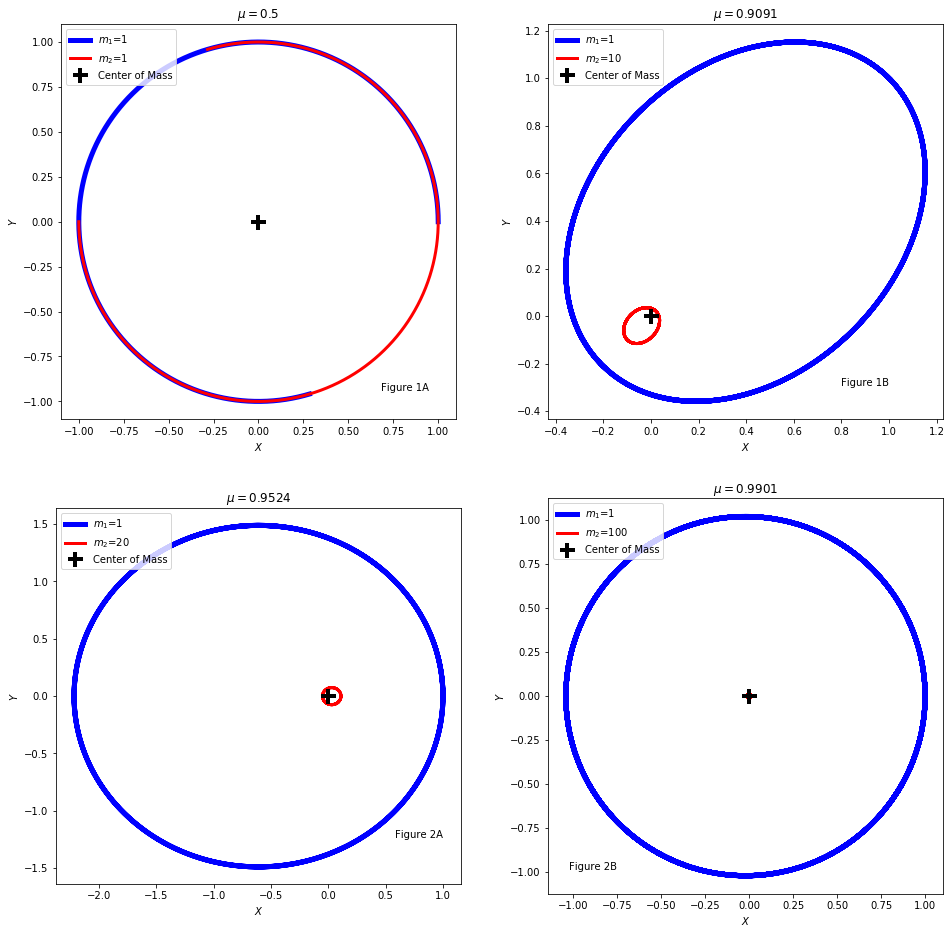

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (16,16))#, sharex=True)

for i in range(4):
    if i == 0:
        m1=1
        m2=1
        x1_0 = 1
        x1dot_0 = 0
        y1_0 = 0
        y1dot_0 = .5
        i=0
        j=0
    elif i == 1:
        m1=1
        m2=10
        x1_0 = 1
        x1dot_0 = -1
        y1_0 = 1
        y1dot_0 = 1
        i=0
        j=1
    elif i == 2:
        m1=1
        m2=20
        x1_0 = 1
        x1dot_0 = 0
        y1_0 = 0
        y1dot_0 = 5
        i=1
        j=0
    elif i == 3:
        m1=1
        m2=100
        x1_0 = 1
        x1dot_0 = 0
        y1_0 = 0
        y1dot_0 = 10
        i=1
        j=1
    o1 = Two_body(G=1,m1=m1,m2=m2)

    t_start = 0.
    t_end = 10.
    delta_t = 0.01
    t_pts = np.arange(t_start, t_end+delta_t, delta_t)

    # COM velocity must be zero in initial conditions so the system doesn't move out of frame
    x2_0 = -m1/m2*x1_0
    x2dot_0 = -m1/m2*x1dot_0
    y2_0 = -m1/m2*y1_0
    y2dot_0 = -m1/m2*y1dot_0
    x_com = (x1_0*m1+x2_0*m2)/(m1+m2)
    y_com = (y1_0*m1+y2_0*m2)/(m1+m2)

    z0 = [x1_0,x1dot_0,y1_0,y1dot_0,x2_0,x2dot_0,y2_0,y2dot_0]
    x_1,x_1_dot,y_1,y_1_dot,x_2,x_2_dot,y_2,y_2_dot = o1.solve_ode(t_pts,z0)

    ax[i,j].plot(x_1, y_1, color='blue', linewidth=5, label = '$m_1$='+str(m1))#, label='sin(x)')
    ax[i,j].plot(x_2, y_2, color='red', linewidth=3, label = '$m_2$='+str(m2))#, label='sin(x)')
    ax[i,j].plot(x_com, y_com, '+',color='black',  mew=4, markersize = 15, label = 'Center of Mass')#, label='sin(x)')
    ax[i,j].set_aspect('equal')
    ax[i,j].set_ylabel('$Y$')
    ax[i,j].set_xlabel('$X$')
    ax[i,j].legend(loc='upper left')
    ax[i,j].set_title('$\mu = $'+str(round(m1*m2 / (m1+m2),4)))
ax[0,0].text(.95, -.95, 'Figure 1A', ha='right', va='bottom')
ax[0,1].text(1, -.3, 'Figure 1B', ha='right', va='bottom')
ax[1,0].text(1, -1.25, 'Figure 2A', ha='right', va='bottom')
ax[1,1].text(-.75, -1, 'Figure 2B', ha='right', va='bottom')
plt.show()

For orbits of near-identical bodies, as in a binary star system, $\mu=0.5$ as in figure 1A. The bodies both orbit the shared center of mass with the same eccentricity and radius. In figure 1B, $m_2$ grows larger causing eccentricities in both orbits, and reducing the semimajor axis of of $m_2$. This trend continues through 2A and 2B, where the orbit of $m_2$ can no longer be seen. This is because $\mu\rightarrow m_1$ as $m_2$ increases, making the orbit of $m_2$ basically stationary. Additionally, the eccentricity of $m_1$'s orbit approaches zero in this case, making the system rather simple. Figure 2B is a good model of the Earth-Sun system, as in this case $\mu=0.999997*m_{Earth}$.

In [13]:
m_earth = 5.9722e24
m_sun = 1.988e30
mu = m_earth*m_sun / (m_earth+m_sun)
print(mu/m_earth)

0.9999969958842762
